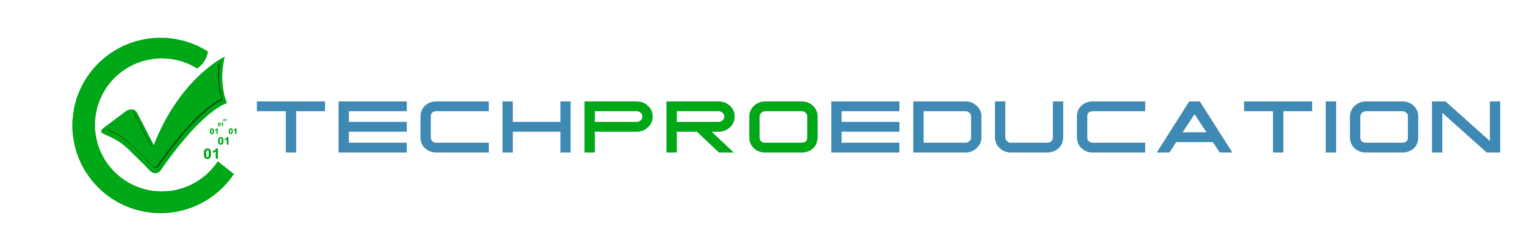

# EFFECTIVE DATA VISUALIZATION IN DATA SCIENCE WITH MATPLOTLIB AND SEABORN

## CODING TASK #1. PLOT PIE CHART USING MATPLOTLIB

- **The plot method on Pandas Series and DataFrames is just a simple wrapper around plt.plot():**
- **Define a Pandas Dataframe with all crypto allocation in a given portfolio**
- **Note that total sum = 100%** 
- **Use matplotlib to plot a pie chart** 

In [15]:
# The plot method on Pandas Series and DataFrames is just a simple wrapper around plt.plot():
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

In [16]:
# Define a Pandas Dataframe with all crypto allocation in a given portfolio
# Note that total sum = 100% 
crypto_df = pd.DataFrame(data = {'allocation_rate':[20, 55, 5, 17, 3]}, index = ['BTC', 'ETH', 'LTC', 'XRP', 'ADA'])
crypto_df

allocation_rate
BTC               20
ETH               55
LTC                5
XRP               17
ADA                3

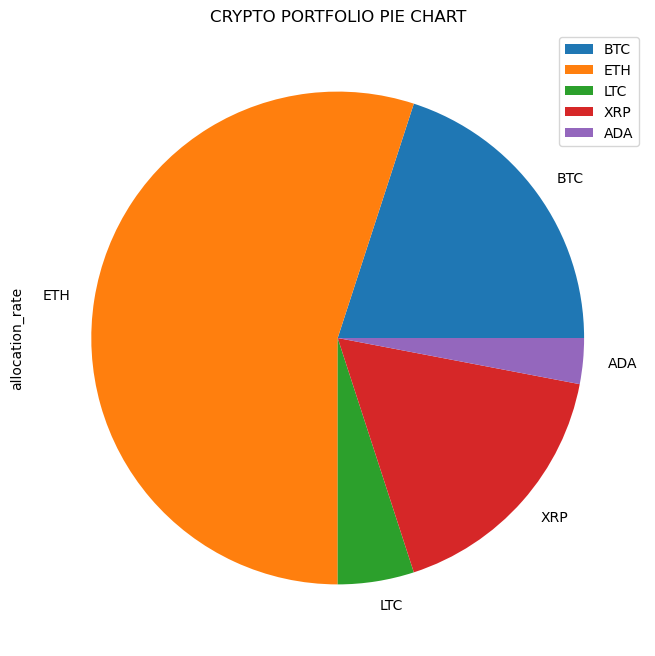

In [17]:
# Use matplotlib to plot a pie chart 
crypto_df.plot.pie(y = 'allocation_rate', figsize = (8, 8))
plt.title('CRYPTO PORTFOLIO PIE CHART');

**PRACTICE OPPORTUNITY #1:**
- **Assume that you became bullish on XRP and decided to allocate 60% of your assets in it. You also decided to equally divide the rest of your assets in other coins (BTC, LTC, ADA, and ETH). Change the allocations and plot the pie chart.**
- **Use 'explode' to increase the separation between XRP and the rest of the portfolio (External Research is Required)**

In [18]:
total = crypto_df['allocation_rate'].sum()
total

100

In [19]:
crypto_df['allocation_rate']["XRP"] = crypto_df['allocation_rate'].sum()*0.60

In [20]:
crypto_df["allocation_rate"]["ETH"]=crypto_df["allocation_rate"]["LTC"]=\
crypto_df["allocation_rate"]["BTC"]=crypto_df["allocation_rate"]["ADA"]=\
(total-crypto_df["allocation_rate"]["XRP"])/ (len(crypto_df["allocation_rate"])-1)

In [23]:
x = crypto_df["allocation_rate"].to_list()
x

[10, 10, 10, 60, 10]

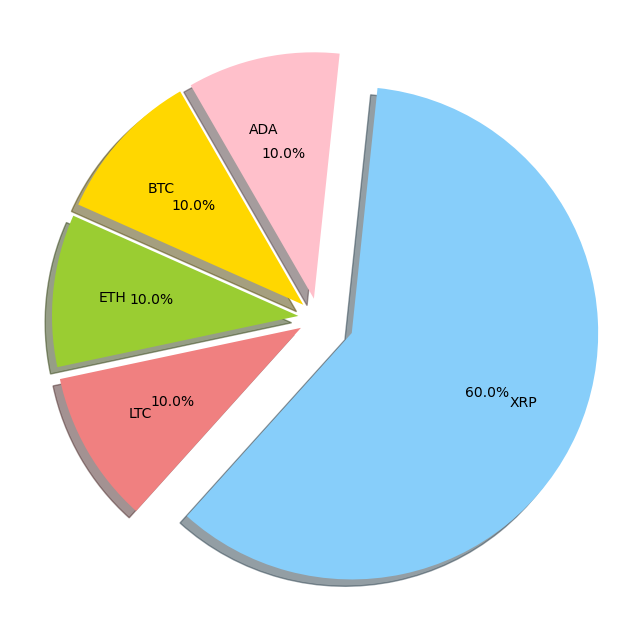

In [24]:
plt.figure(figsize=(10, 8))

color_list = ["gold", "yellowgreen", "lightcoral", "lightskyblue", "pink"]
explode_list = [0.08, 0.08, 0.08, 0.15, 0.08]



plt.pie(x, labels = crypto_df.index, labeldistance = 0.7, autopct="%.1f%%", startangle = 120, shadow = True, pctdistance=0.6, 
        colors=color_list, explode = explode_list)

#plt.legend(loc=(0))
plt.show()

## CODING TASK #2. PLOT SINGLE & MULTIPLE LINE PLOTS USING MATPLOTLIB
- **Use Pandas read_csv to read crypto_daily_prices (BTC, ETH, and LTC)**
- **Use matplotlib on the Pandas DataFrame to plot the data**

In [6]:
investments_df = pd.read_csv('crypto_daily_prices.csv')
investments_df.head()

Date         BTC  ETH  ADA
0  9/17/2014  457.334015  NaN  NaN
1  9/18/2014  424.440002  NaN  NaN
2  9/19/2014  394.795990  NaN  NaN
3  9/20/2014  408.903992  NaN  NaN
4  9/21/2014  398.821014  NaN  NaN

In [7]:
investments_df["Date"] = pd.to_datetime(investments_df.Date)

In [8]:
investments_df.set_index("Date", inplace=True)

In [9]:
investments_df["year_of_month"] = investments_df.index.strftime("%Y-%m")
investments_df.head()

BTC  ETH  ADA year_of_month
Date                                          
2014-09-17  457.334015  NaN  NaN       2014-09
2014-09-18  424.440002  NaN  NaN       2014-09
2014-09-19  394.795990  NaN  NaN       2014-09
2014-09-20  408.903992  NaN  NaN       2014-09
2014-09-21  398.821014  NaN  NaN       2014-09

In [10]:
investments_df2 = investments_df.groupby("year_of_month").mean()

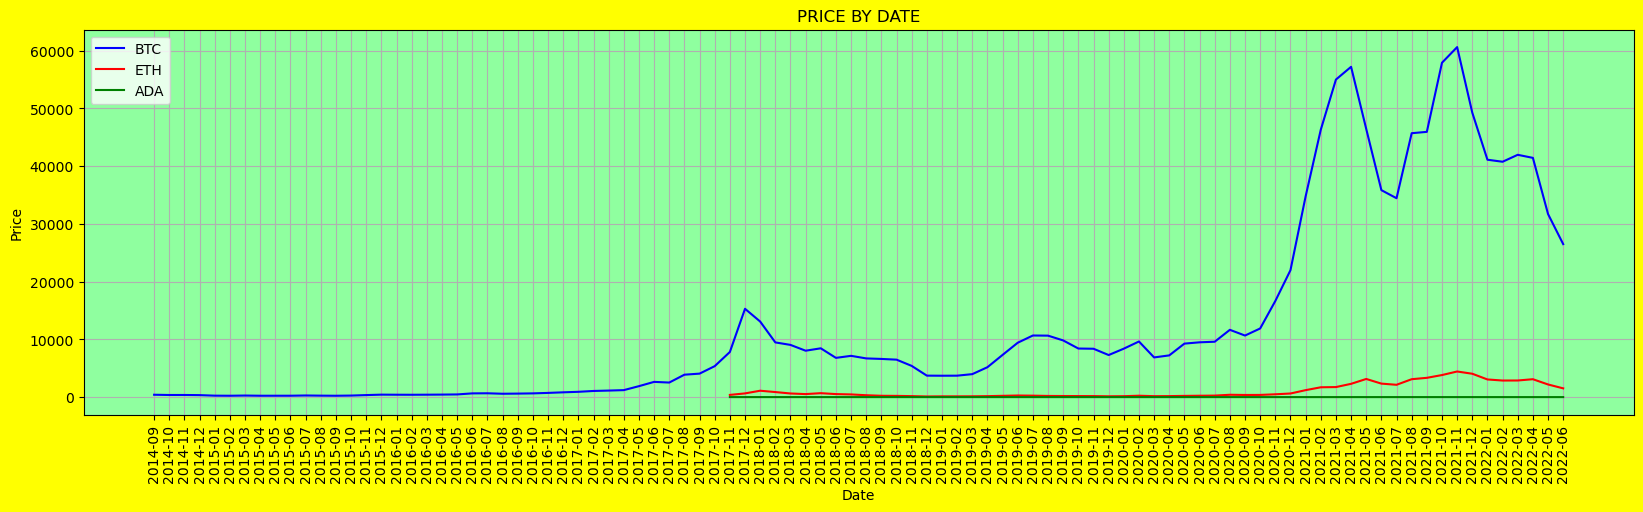

In [11]:
plt.figure(facecolor = "yellow", figsize = (20, 5))

ax = plt.axes()
ax.set_facecolor("xkcd:mint green")

plt.plot(investments_df2.index, investments_df2.BTC, "b-", label = "BTC")
plt.plot(investments_df2.index, investments_df2.ETH, "r-", label = "ETH")
plt.plot(investments_df2.index, investments_df2.ADA, "g-", label = "ADA")

plt.xticks(rotation = 90)
plt.xlabel ("Date")
plt.ylabel("Price")
plt.legend(loc = "upper left")
plt.grid()
plt.title("PRICE BY DATE");

**PRACTICE OPPORTUNITY #2:**
- **Use subplots attribute to plot separate figures for BTC, ETH, and ADA**

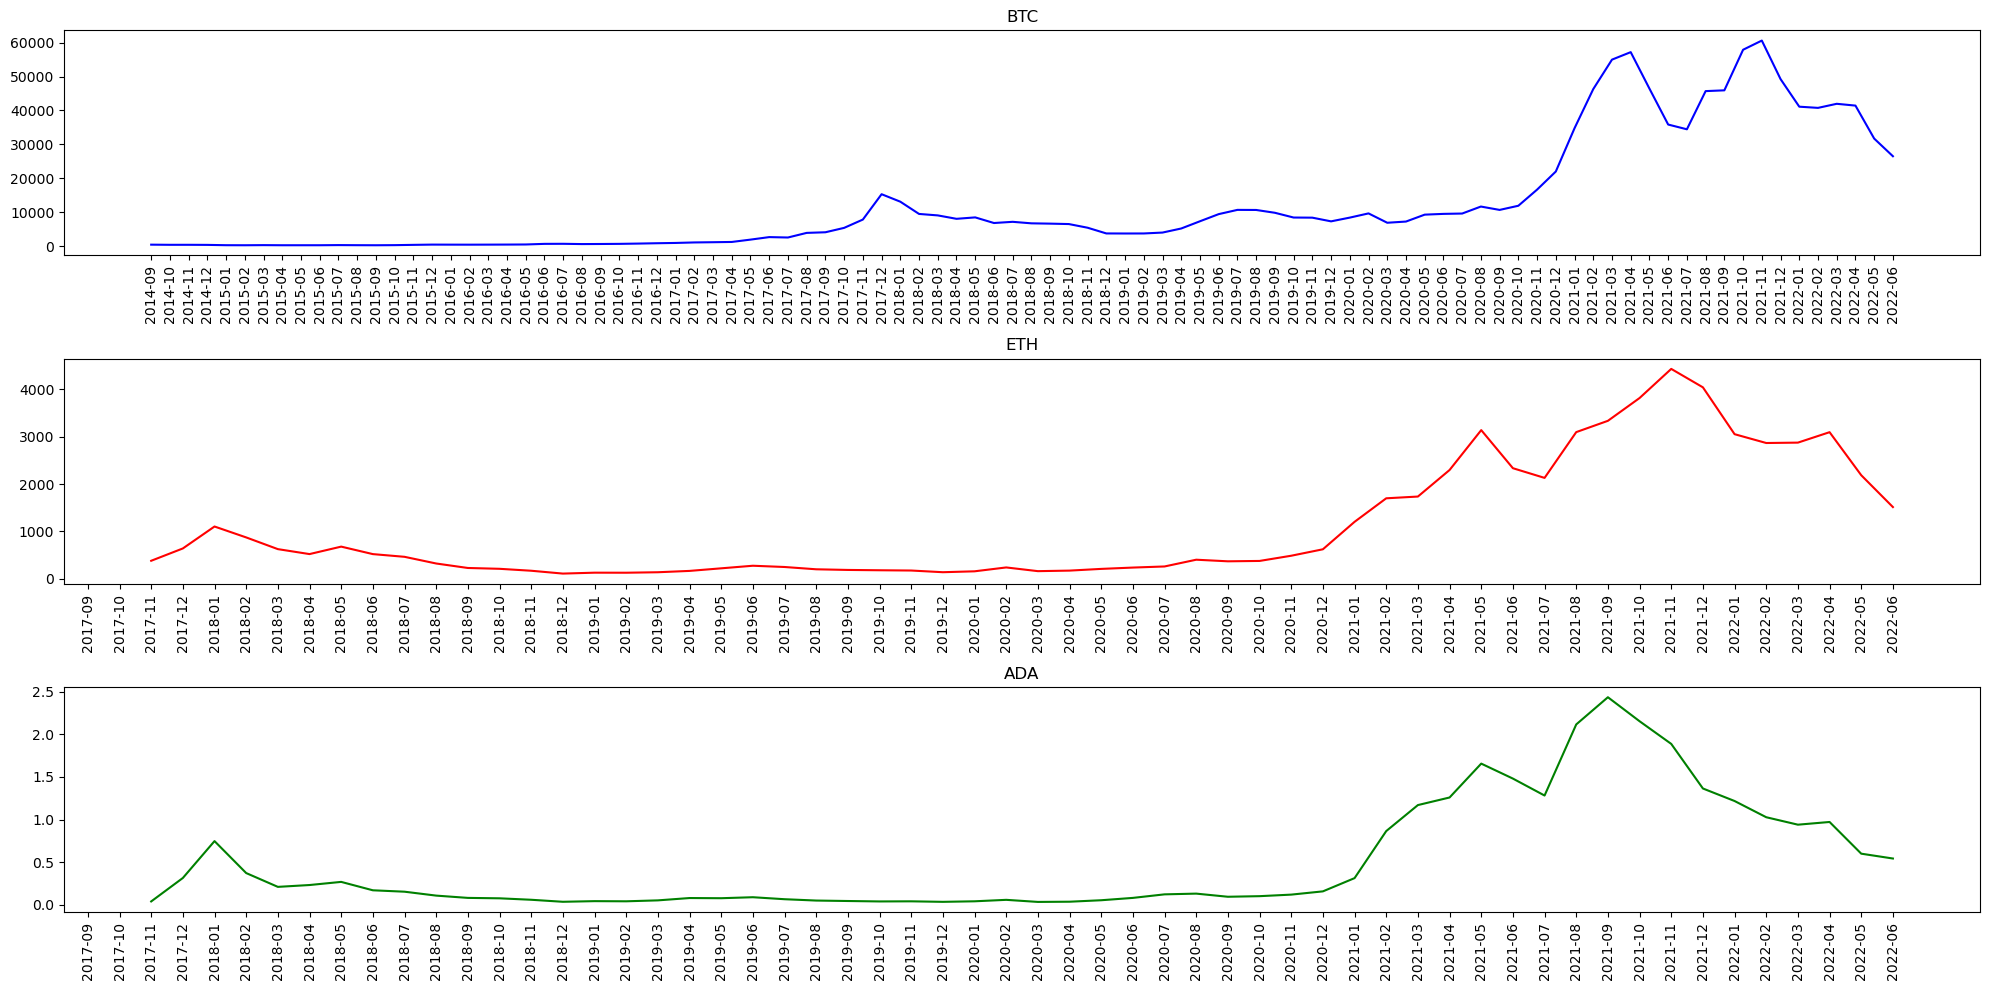

In [12]:
fig, ax = plt.subplots(3, 1, figsize = (20,10))

ax[0].plot(investments_df2.index, investments_df2.BTC, "b")
ax[0].set_xticklabels(investments_df2.index, rotation=90)
ax[0].set_title("BTC")

ax[1].plot(investments_df2.index, investments_df2.ETH, "r")
ax[1].set_xticklabels(investments_df2.index, rotation=90)
ax[1].set_title("ETH")

ax[2].plot(investments_df2.index, investments_df2.ADA, "g")
ax[2].set_xticklabels(investments_df2.index, rotation=90)
ax[2].set_title("ADA")

plt.tight_layout();

## CODING TASK #3. PLOT SCATTERPLOTS USING MATPLOTLIB
- **Read daily return data using pandas**
- **Plot Daily returns of BTC vs. ETH**

In [13]:
daily_return_df = pd.read_csv('crypto_daily_returns.csv')
daily_return_df

Date       BTC        ETH        ADA
0     9/17/2014  0.000000   0.000000   0.000000
1     9/18/2014 -7.192558        NaN        NaN
2     9/19/2014 -6.984264        NaN        NaN
3     9/20/2014  3.573492        NaN        NaN
4     9/21/2014 -2.465854        NaN        NaN
...         ...       ...        ...        ...
2828  6/15/2022  1.648355   1.778018  10.097317
2829  6/16/2022 -9.707194 -13.418330 -10.927140
2830  6/17/2022  0.440750   1.759673   2.604094
2831  6/18/2022 -7.101781  -8.548629  -6.403471
2832  6/19/2022  2.477931   4.717365   1.737703

[2833 rows x 4 columns]

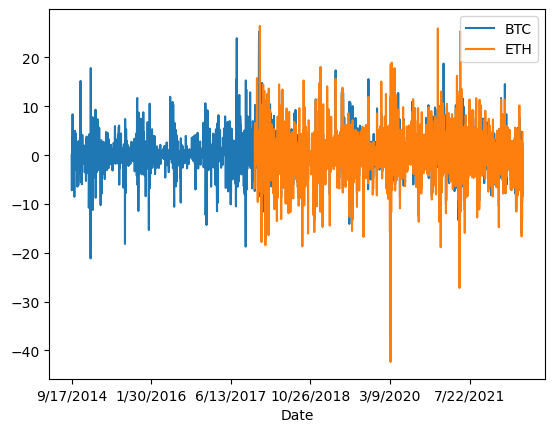

In [14]:
daily_return_df.plot(x="Date", y=["BTC", "ETH"])
plt.show()

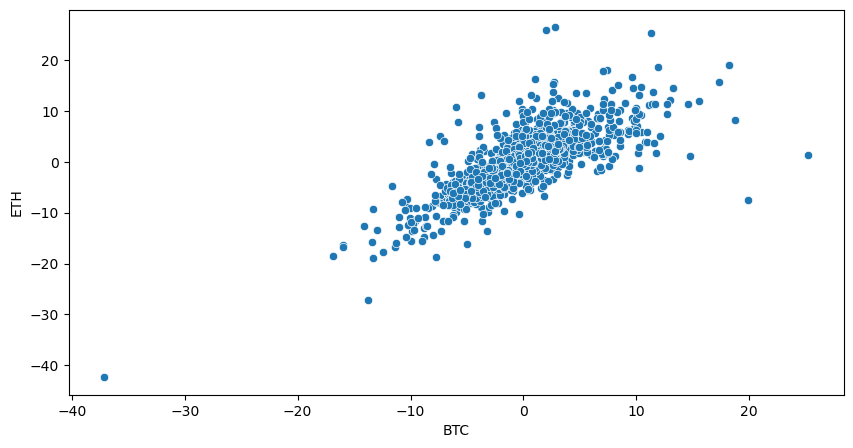

In [19]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = "BTC", y = "ETH", data = daily_return_df)
plt.show();

**PRACTICE OPPORTUNITY #3:**
- **Plot the daily returns of BTC vs. ADA, choose your favourite color!**

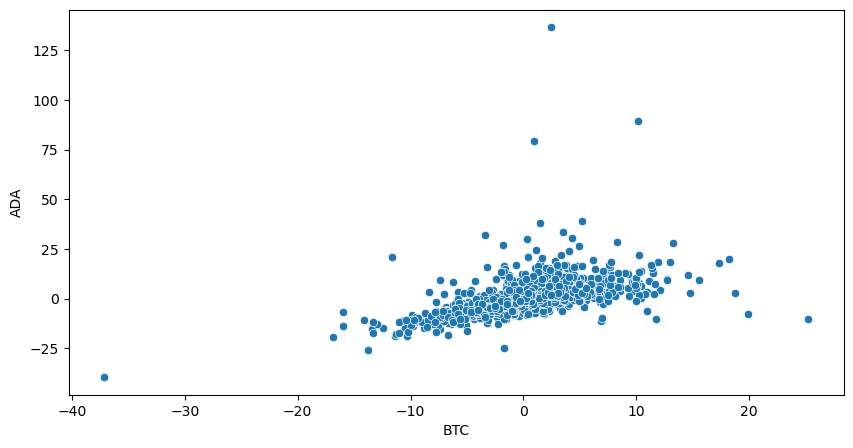

In [20]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = "BTC", y = "ADA", data = daily_return_df, palette = "c")
plt.show();

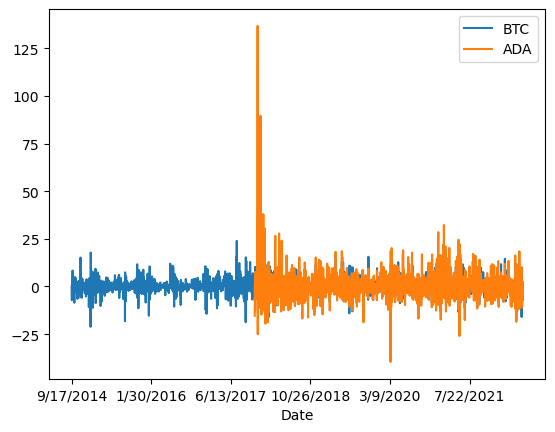

In [22]:
daily_return_df.plot(x="Date", y=["BTC", "ADA"])
plt.show()

## CODING TASK #4. PLOT HISTOGRAMS USING MATPLOTLIB
- **A histogram represents data using bars with various heights**
- **Each bar groups numbers into specific ranges**
- **Taller bars show that more data falls within that specific range**
- **Plot the histogram of the returns**

In [23]:
daily_return_df = pd.read_csv('crypto_daily_returns.csv')
daily_return_df

Date       BTC        ETH        ADA
0     9/17/2014  0.000000   0.000000   0.000000
1     9/18/2014 -7.192558        NaN        NaN
2     9/19/2014 -6.984264        NaN        NaN
3     9/20/2014  3.573492        NaN        NaN
4     9/21/2014 -2.465854        NaN        NaN
...         ...       ...        ...        ...
2828  6/15/2022  1.648355   1.778018  10.097317
2829  6/16/2022 -9.707194 -13.418330 -10.927140
2830  6/17/2022  0.440750   1.759673   2.604094
2831  6/18/2022 -7.101781  -8.548629  -6.403471
2832  6/19/2022  2.477931   4.717365   1.737703

[2833 rows x 4 columns]

In [25]:
mu = round(daily_return_df['BTC'].mean(), 2) # mean of distribution
sigma = round(daily_return_df['BTC'].std(), 2) # standard deviation of distribution
 
num_bins = 40

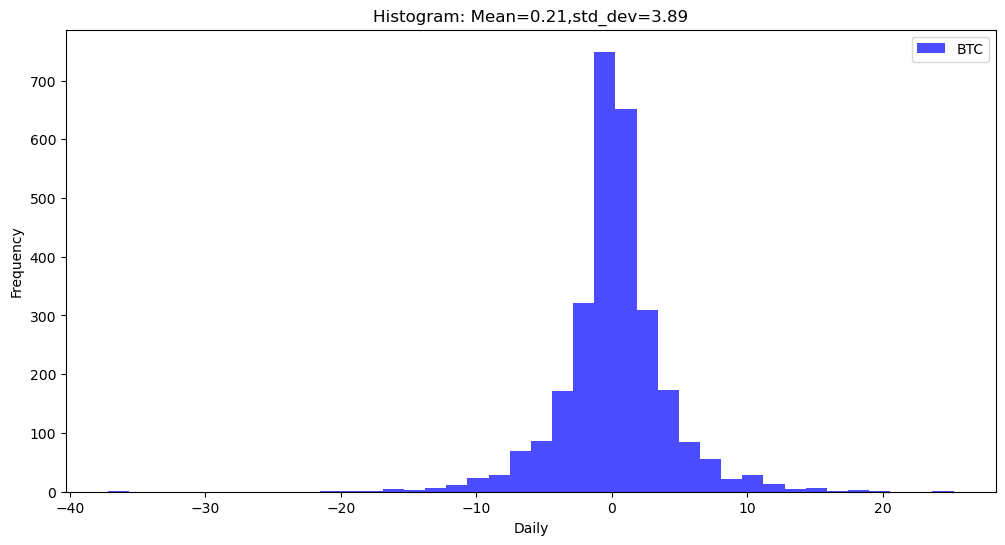

In [26]:
plt.figure(figsize=(8,6))
daily_return_df['BTC'].plot.hist(bins = num_bins, color = 'b', alpha = 0.7, figsize = (12, 6))
plt.xlabel("Daily")
plt.ylabel("Frequency")
plt.title("Histogram: Mean=" + str(mu) + ",std_dev=" + str(sigma))
plt.legend()
plt.show()

**PRACTICE OPPORTUNITY #4:**
- **Plot the histogram for BTC and ETH returns using 60 bins. Display all histograms on the same figure**


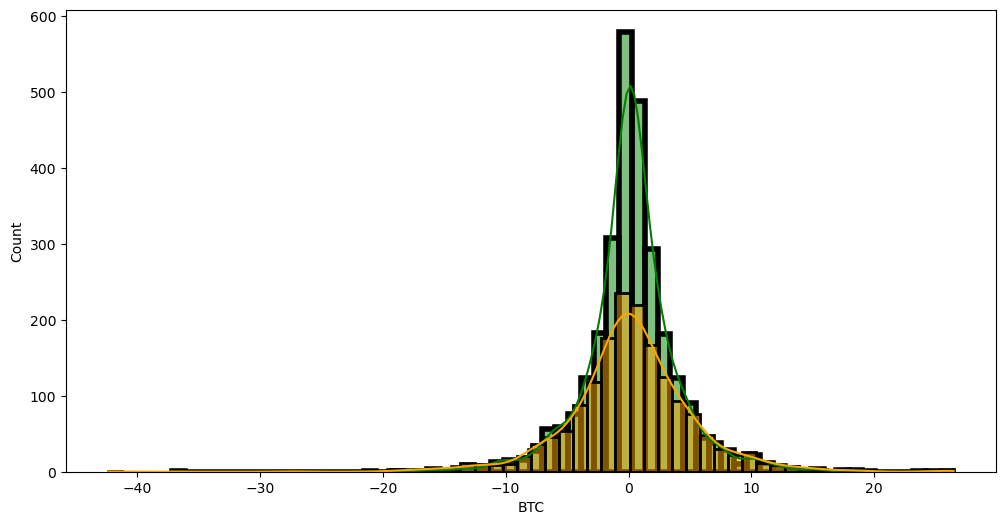

In [28]:
plt.figure(figsize=(12,6))
sns.histplot(data = daily_return_df, x = daily_return_df.BTC, linewidth = 4, kde = True, color="green", bins=60)
sns.histplot(data = daily_return_df, x = daily_return_df.ETH, linewidth = 2, kde = True, color="orange", bins=60);

## CODING TASK #5. PLOT SCATTERPLOT & COUNTPLOT USING SEABORN
- **Seaborn is a visualization library that sits on top of matplotlib**
- **Seaborn offers enhanced features compared to matplotlib**
- **https://seaborn.pydata.org/examples/index.html*/*
- **Check out the head of the dataframe**
- **Check out the tail of the dataframe**
- **Plot scatter plot between mean area and mean smoothness**
- **Let's print out countplot to know how many samples belong to class #0 and #1**

In [23]:
# import libraries 
import pandas as pd # Import Pandas for data manipulation using dataframes
import numpy as np # Import Numpy for data statistical analysis 
import matplotlib.pyplot as plt # Import matplotlib for data visualisation
import seaborn as sns # Statistical data visualization
pd.options.display.max_columns=50

In [30]:
# Import Cancer data 
cancer_df = pd.read_csv('cancer.csv')

In [31]:
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [32]:
cancer_df.tail()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
564                 0.05623  ...          26.40           166.10      2027.0   
565                 0.05533  ...          38.25           155.00      1731.0   
566                 0.05648  ...          34.12           126.70      1124.0   
567                 0.07016  ...          39.42           184.60      1821.0   
568                 0.05884  ...          30.37            59.16       268.6   

     worst smoothness  worst compactness  worst concavity  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     worst concave points  worst symmetry  worst fractal dimension  target  
564                0.2216          0.2060                  0.07115       0  
565                0.1628          0.2572                  0.06637       0  
566                0.1418          0.2218                  0.07820       0  
567                0.2650          0.4087                  0.12400       0  
568                0.0000          0.2871                  0.07039       1  

[5 rows x 31 columns]

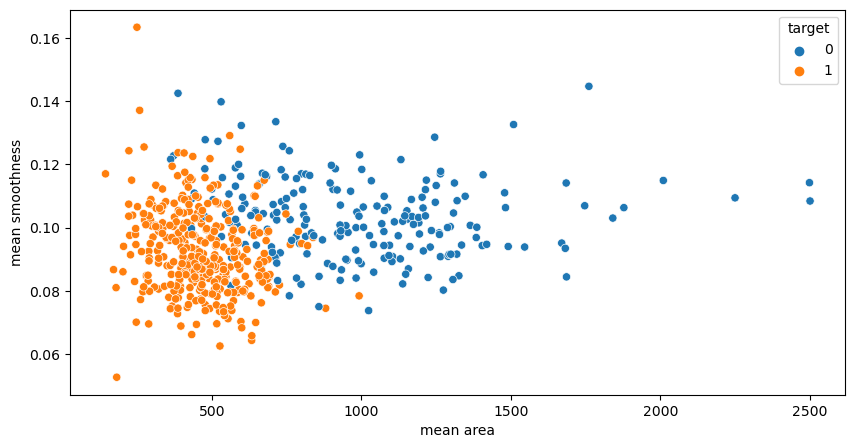

In [33]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = cancer_df["mean area"], y = cancer_df["mean smoothness"], hue = "target", data = cancer_df)

plt.xlabel('mean area')
plt.ylabel('mean smoothness')
 
plt.show()

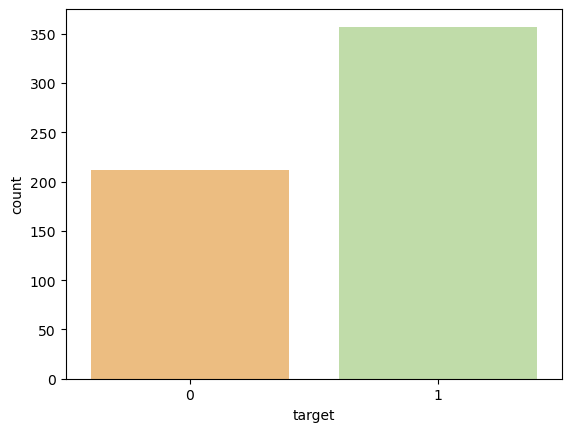

In [34]:
sns.countplot(x = "target", data = cancer_df, palette='Spectral');

**PRACTICE OPPORTUNITY #5:**
- **Plot the scatterplot between the mean radius and mean area. Comment on the plot** 


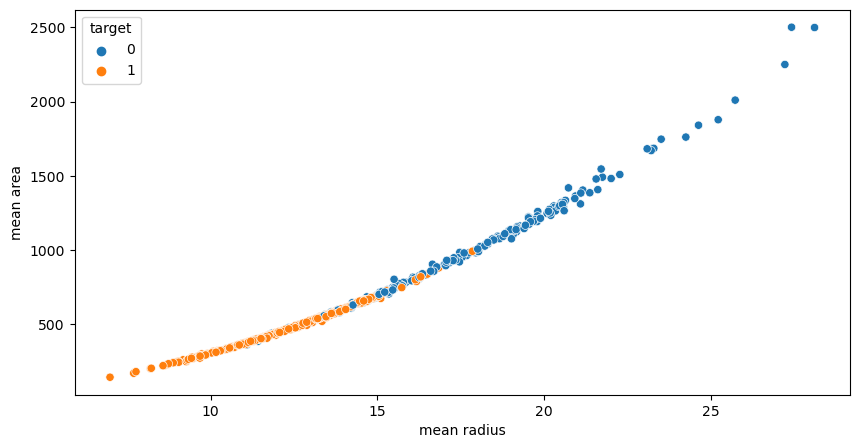

In [35]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = "mean radius", y = "mean area", data = cancer_df, hue = "target")

plt.xlabel('mean radius')
plt.ylabel('mean area')
 
plt.show()

In [25]:
# yüksek correlationı olan bir grafik. radius'u 16dan düşük ve areası 1000'den küçük olan durumlarda target 1 oluyor.

## CODING TASK #6. PLOT PAIRPLOT, DISPLOT, AND HEATMAPS/CORRELATIONS USING SEABORN

- **Plot the pairplot**
- **Strong correlation between the mean radius and mean perimeter, mean area and mean primeter**
- **plot the distplot** 
- **Displot combines matplotlib histogram function with kdeplot() (Kernel density estimate)**
- **KDE is used to plot the Probability Density of a continuous variable.** 

In [37]:
# sns.pairplot(data=cancer_df,plot_kws={'alpha':0.3},palette='autumn_r')
# plt.show()

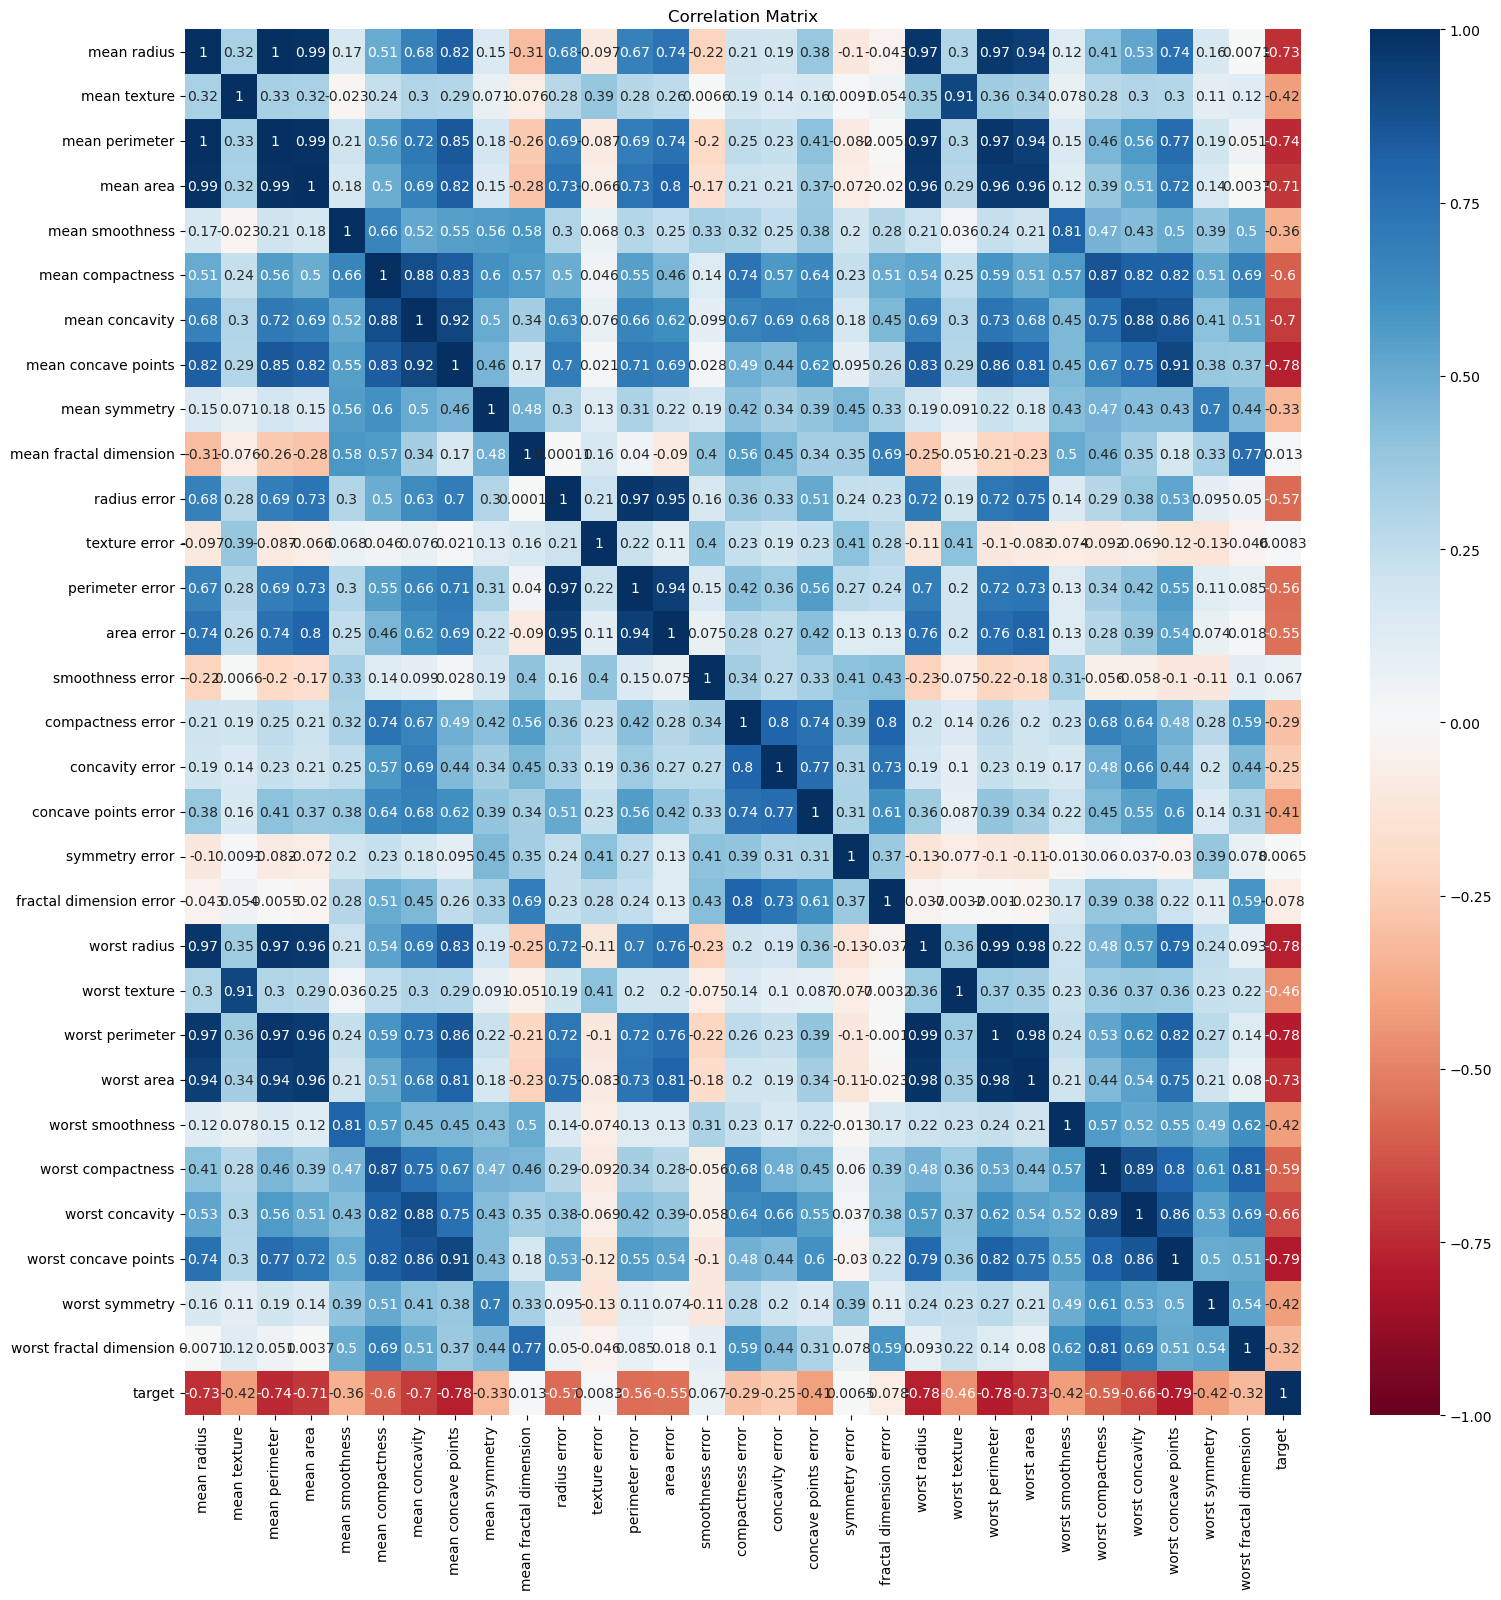

In [38]:
plt.figure(figsize=(18,18))
sns.heatmap(cancer_df.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

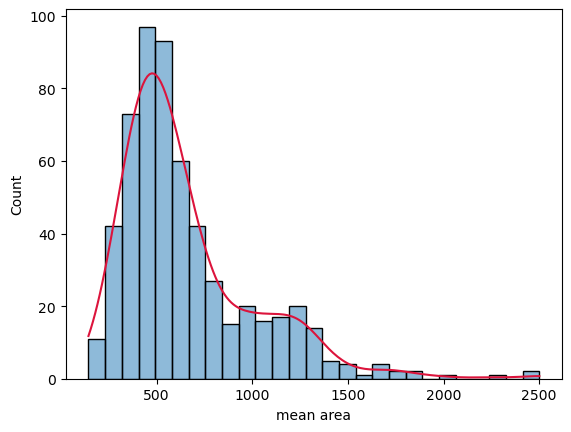

In [39]:
ax = sns.histplot(data=cancer_df, x="mean area", kde=True)
ax.lines[0].set_color('crimson')

**PRACTICE OPPORTUNITY #6:**
- **Plot two separate distplot for each target class #0 and target class #1**


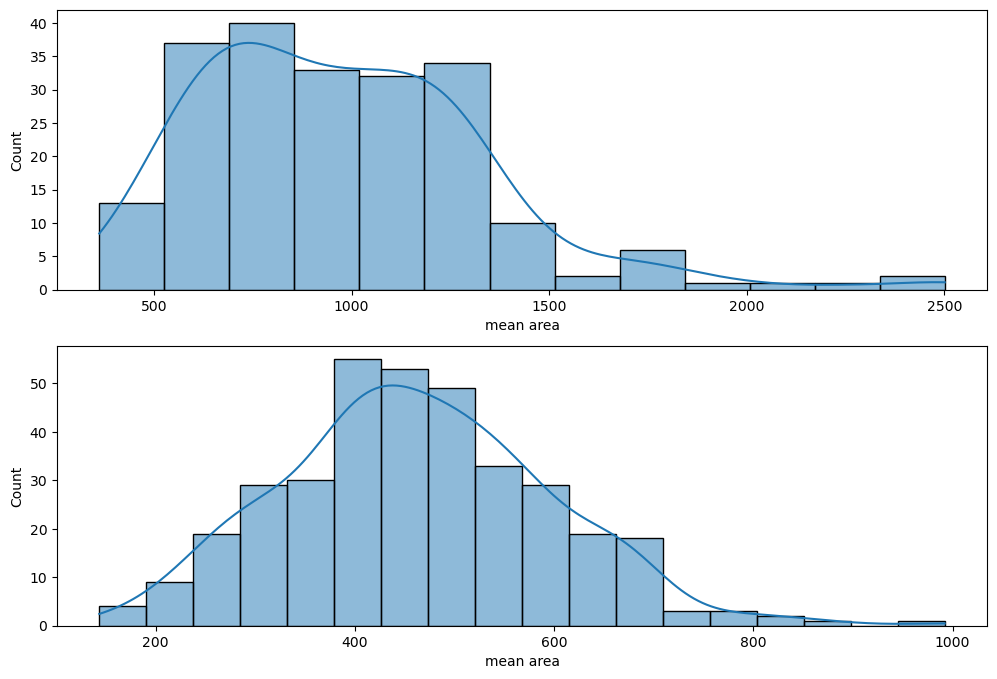

In [46]:
fig, ax = plt.subplots(2,1, figsize=(12,8))
sns.histplot(data = cancer_df[cancer_df.target == 0], x="mean area", kde=True, ax=ax[0])

sns.histplot(data = cancer_df[cancer_df.target == 1], x="mean area", kde=True, ax=ax[1]);

# EXCELLENT JOB!

# FINAL CAPSTONE PROJECT 

- In this project, we will visualize stock prices using Seaborn and Matplotlib. 4 Stocks are considered including JP Morgan Chase (JP), Procter and Gamble (P&G) (PG), Apple (AAPL) and United Airlines (UAL).
- Using the stock_daily_prices.csv and stocks_daily_returns.csv dataset included in the course/workshop package, please do the following:
    - Import both datasets using Pandas.
    - Using Matplotlib, plot lineplots that display all 4 stocks daily prices on one single figure.
    - Using Matplotlib, plot 4 stocks daily prices on multiple subplots.
    - Using Matplotlib, plot the 4 plots on subplots next to each other (all figures in one row).
    - Using Matplotlib, plot the scatterplot between Apple and JP Morgan daily returns. 
    - Using Seaborn, plot similar scatterplot between Apple and JP Morgan daily returns. 
    - Assume that you decided to become bullish on AAPL and you allocated 70% of your assets in it. You also decided to equally divide the rest of your assets in other stocks (JPM, PG, and UAL). Using Matplotlib, plot a pie chart that shows these allocations. Use 'explode’ attribute to increase the separation between AAPL and the rest of the portfolio.
    - Using Matplotlib, plot the histogram for United Airlines and P&G returns using 40 bins with red color. Display the mean and Standard deviation for both stocks on top of the figure. What did you conclude from this graph?
    - Using Seaborn, plot a heatmap that shows the correlations between stocks daily returns. Comment on the correlation between UAL and P&G.
    - Plot a 3D plot showing all daily returns from JPM, AAPL and UAL [External Research is required].

In [47]:
df_prices = pd.read_csv("stocks_daily_prices.csv")
df_returns = pd.read_csv("stocks_daily_returns.csv")

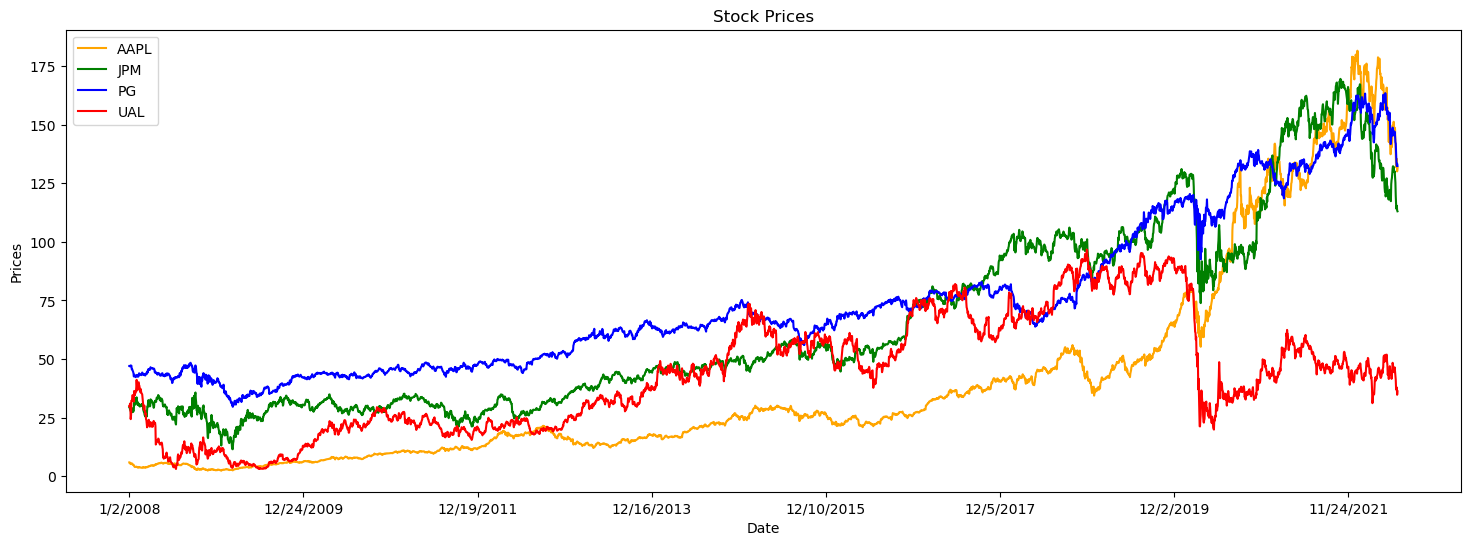

In [39]:
df_prices.plot(x = 'Date', y = ['AAPL', 'JPM', 'PG','UAL'], 
               label = ['AAPL', 'JPM', 'PG','UAL'], 
               subplots = False, figsize = (18, 6), 
               color = ['orange', 'green', 'blue','red'])
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Stock Prices')
plt.legend(loc = 'upper left');

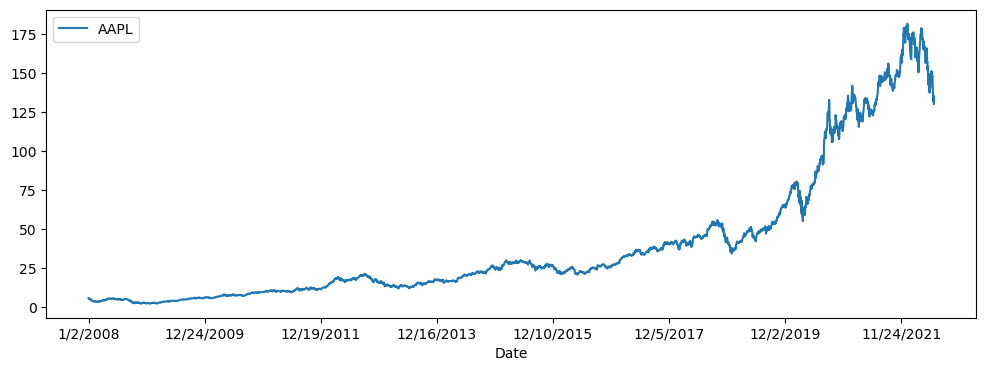

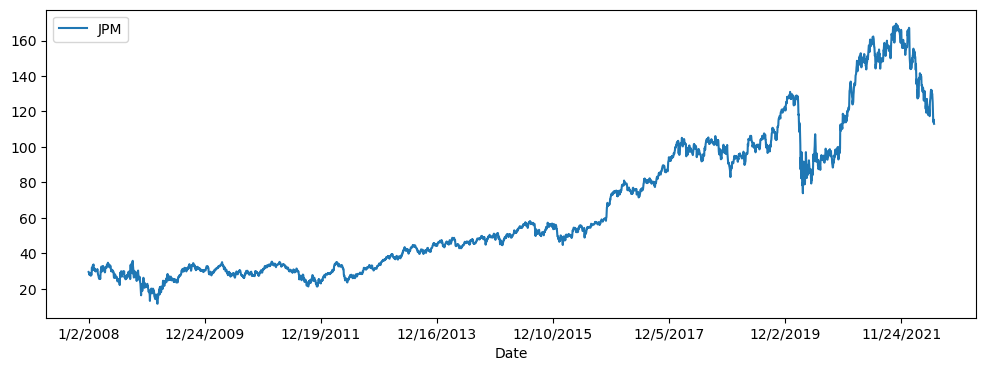

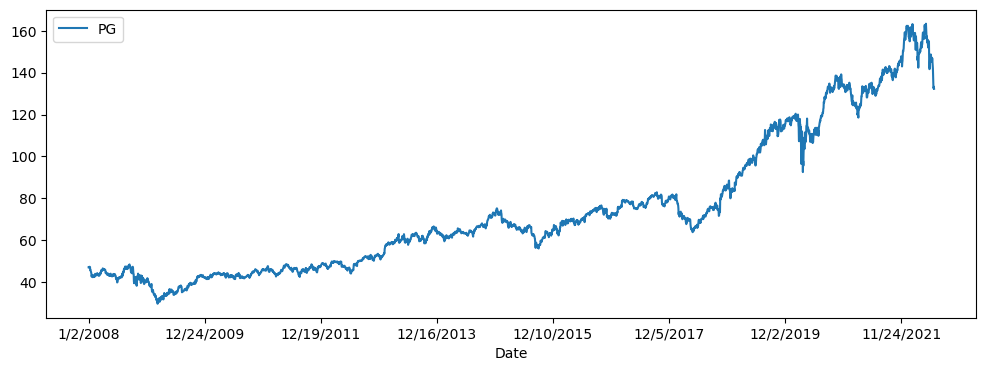

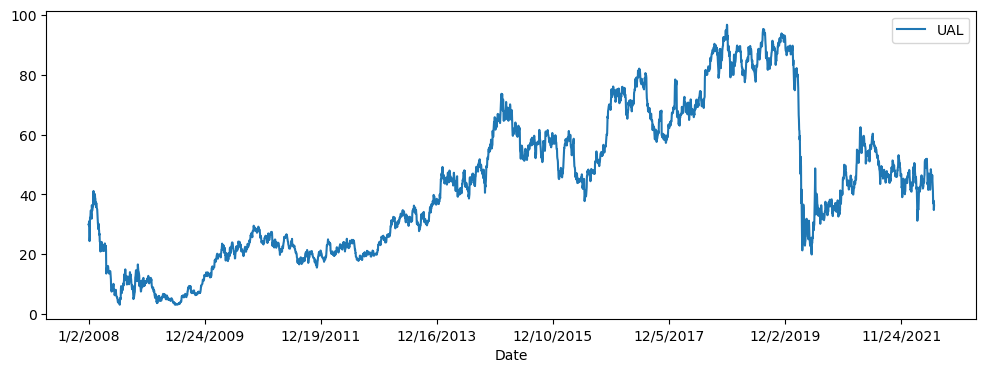

In [40]:
stocks = ['AAPL', 'JPM', 'PG', 'UAL'] 

for i in stocks:
    df_prices.plot(x = 'Date', y = i, label = i, figsize = (12, 4))
    plt.show()

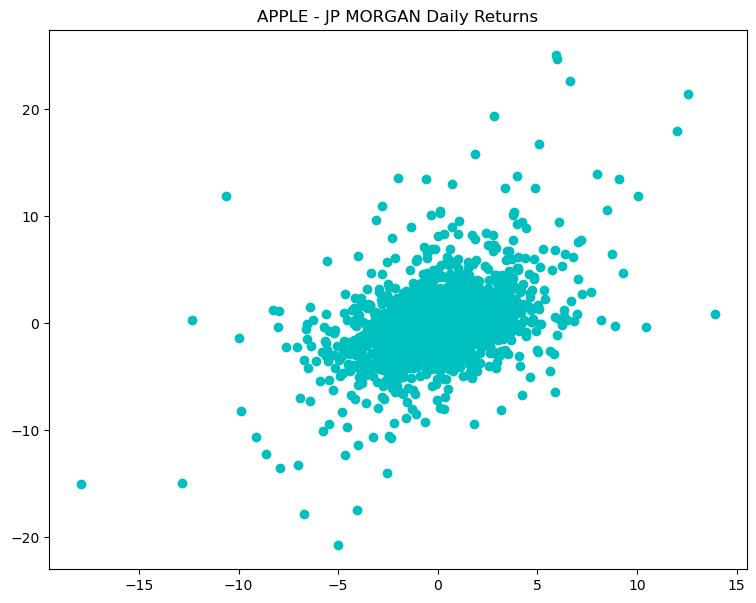

In [41]:
plt.figure(figsize=(9, 7))

plt.scatter(x = df_returns.AAPL, y = df_returns.JPM, color = "c")
plt.title("APPLE - JP MORGAN Daily Returns");

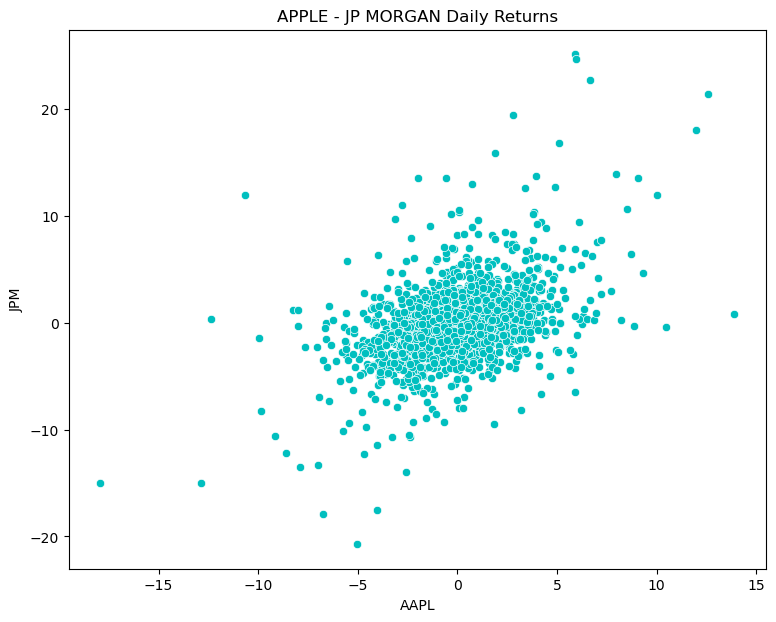

In [42]:
plt.figure(figsize=(9, 7))

sns.scatterplot(x = df_returns.AAPL, y = df_returns.JPM, color = "c")
plt.title("APPLE - JP MORGAN Daily Returns");

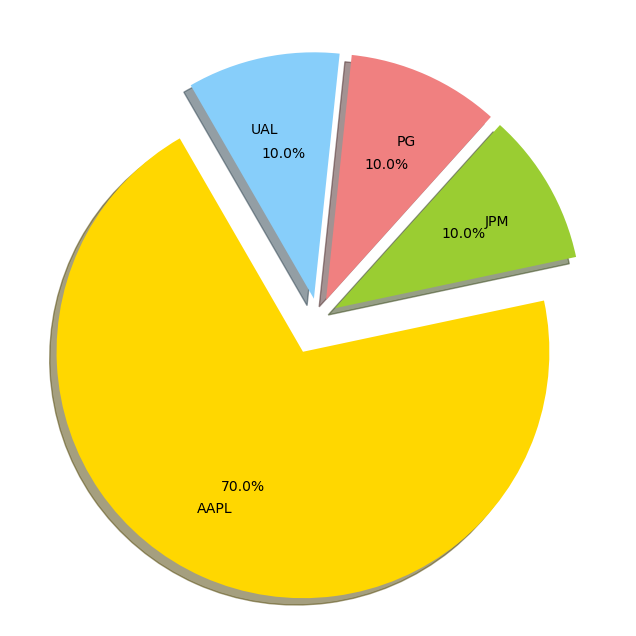

In [43]:
x = [70, 10, 10, 10]

label = ["AAPL", "JPM", "PG", "UAL"]

plt.figure(figsize=(10, 8))

color_list = ["gold", "yellowgreen", "lightcoral", "lightskyblue"]
explode_list = [0.15, 0.08, 0.08, 0.08]



plt.pie(x, labels = label, labeldistance = 0.7, autopct="%.1f%%", startangle = 120, shadow = True, pctdistance=0.6, 
        colors=color_list, explode = explode_list)

#plt.legend(loc=(0))
plt.show()

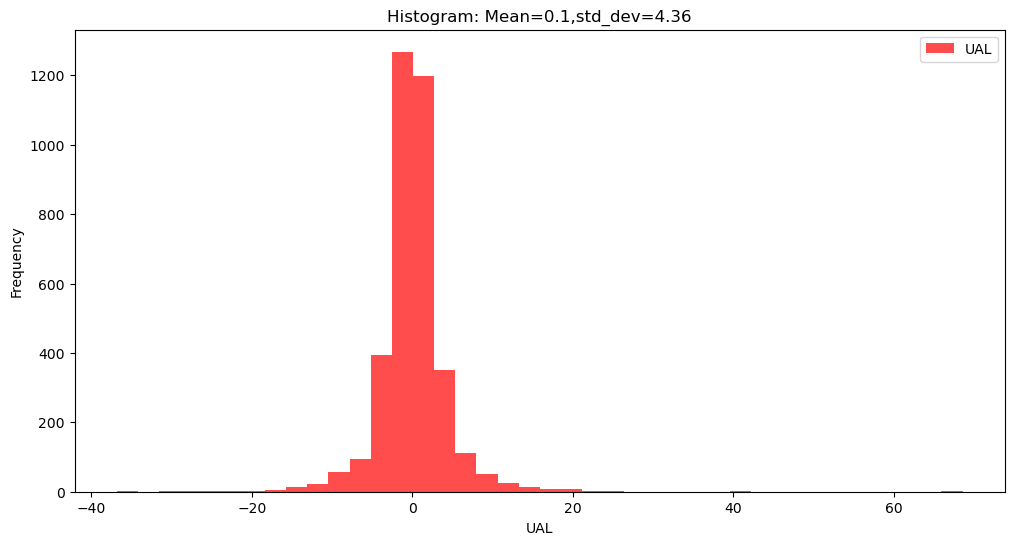

In [53]:
mu = round(df_returns['UAL'].mean(), 2) # mean of distribution
sigma = round(df_returns['UAL'].std(), 2) # standard deviation of distribution

plt.figure(figsize=(8,6))
df_returns['UAL'].plot.hist(bins = 40, color = 'r', alpha = 0.7, figsize = (12, 6))
plt.xlabel("UAL")
plt.ylabel("Frequency")
plt.title("Histogram: Mean=" + str(mu) + ",std_dev=" + str(sigma))
plt.legend()
plt.show()

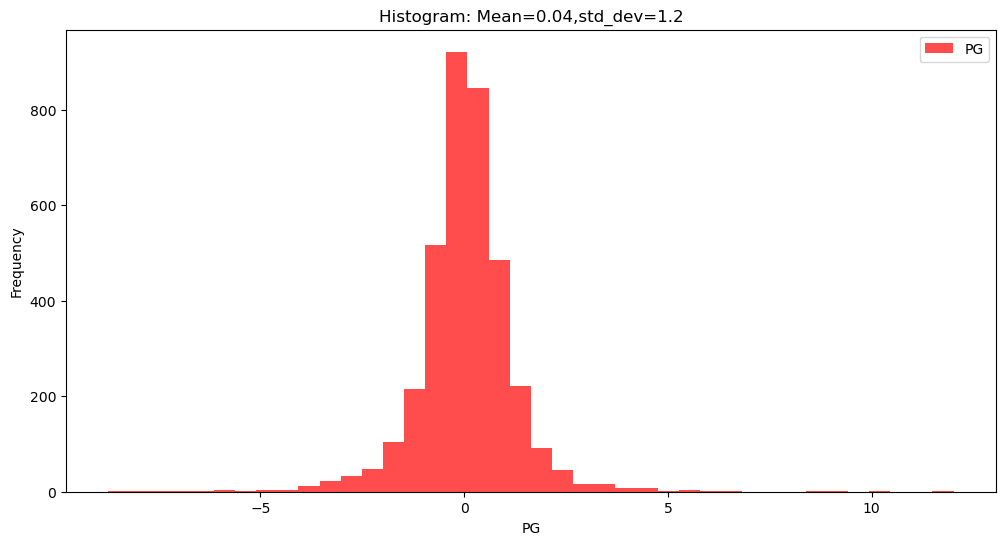

In [54]:
mu = round(df_returns['PG'].mean(), 2) # mean of distribution
sigma = round(df_returns['PG'].std(), 2) # standard deviation of distribution


plt.figure(figsize=(8,6))
df_returns['PG'].plot.hist(bins = 40, color = 'r', alpha = 0.7, figsize = (12, 6))
plt.xlabel("PG")
plt.ylabel("Frequency")
plt.title("Histogram: Mean=" + str(mu) + ",std_dev=" + str(sigma))
plt.legend()
plt.show()

In [ ]:
# ORtalama değerleri birbirine yakıt fakat standart sapma değerleri farklı, ikisi de normal dağılıma benziyor

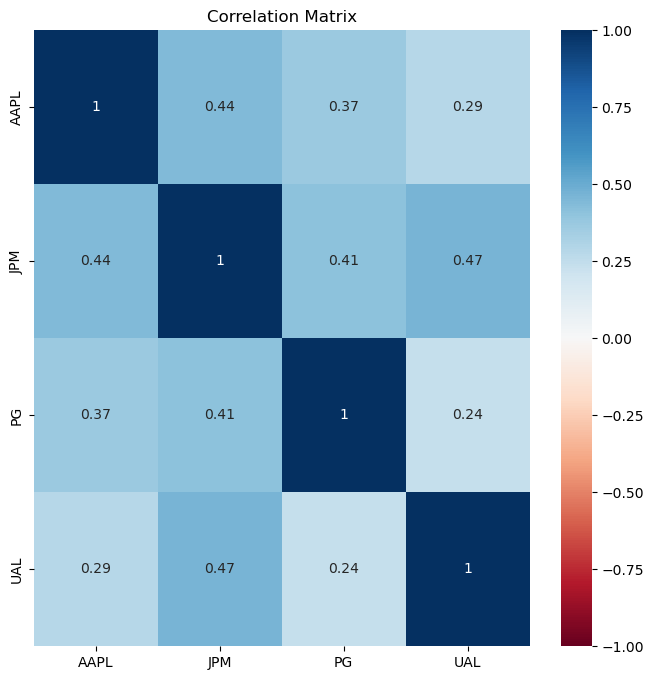

In [56]:
plt.figure(figsize=(8,8))
sns.heatmap(df_returns.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [1]:
# UAL ve PG düşük pozitif bir correlation vardır.

In [56]:
import plotly as py

import plotly.graph_objs as go # veri görselleştirme için düşük düzey arayüz
import plotly.express as px # veri görselleştirme için üst düzey arayüz kısaca daha komplex bir görsel için daha az kod satırı

from plotly.offline import init_notebook_mode, iplot, plot

In [57]:
trace1 = go.Scatter3d(
                    x = df_returns.JPM,
                    y = df_returns.AAPL,
                    z = df_returns.UAL,
                    mode = "markers",
                    marker = dict(size = 7, color = "rgb(255, 0, 0)",))

data = [trace1]
layout = go.Layout(
                )
fig = go.Figure(data = data, layout = layout)
iplot(fig)

# GREAT JOB!

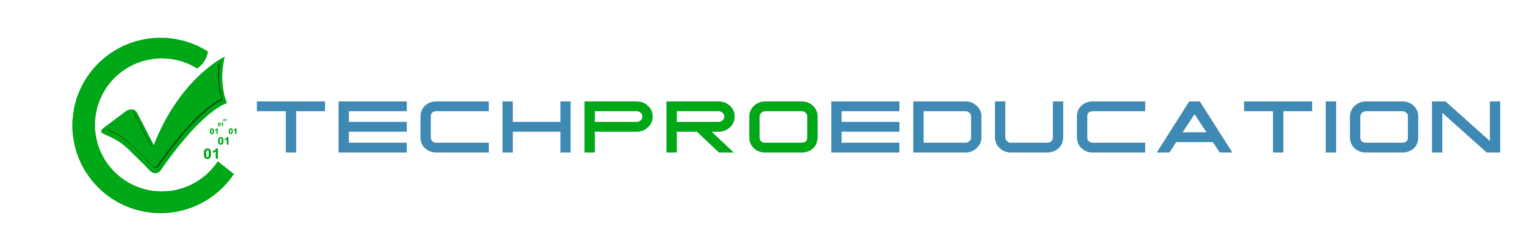